<a href="https://colab.research.google.com/github/emmanuelvrm/portifolio/blob/main/An%C3%A1lise_de_campanha_de_produto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de campanha de produto

O CSV a seguir é referente a diversas pessoas que foram expostas a um anúncio em redes sociais. 
As variáeis são: 
- User ID (identificação do usuário)
- Gender (Gênero do usuário)
- Age (Idade do usuário)
- EstimatedSalary (Salário Estimado do usuário por ano)
- Purchased (Indicação se o usuário fez a compra (1: Sim, 0: Não)

Com base nisso desejo avaliar a eficácia da campanha identificando o público alvo.

In [179]:
import numpy as np
import pandas as pd

In [112]:

df = pd.read_csv('https://raw.githubusercontent.com/emmanuelvrm/portifolio/main/Mini_Analises/Campanha_rede_social_1/data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


## Separando classe social e faixas etárias

In [121]:
#Variavel salario mensal
df['Month_Salary'] = (df['EstimatedSalary']/12).round(2)

#Definindo classes sociais
def classes(x):
  if x <= 1300:
    return 'E'
  elif 1300 > x < 2004:
    return 'D'
  elif 2004 > x < 8640:
    return 'C'
  elif 8640 > x < 11621:
    return 'B'
  else:
    return 'A'
df['Classes'] = df['Month_Salary'].apply(classes)

#Definição de faixas de idade
def idade(x):
  if x <= 17:
    return 'Criança'
  elif 18 > x < 30:
    return 'Jovem adulto'
  elif 30 > x < 40:
    return 'Adulto'
  elif 40 > x < 50:
    return 'Adulto maduro'
  elif 50 > x < 60:
    return 'Jovem idoso'
  else:
    return 'Idoso'
df['Faixa etaria'] = df['Age'].apply(idade)

#Melhorar visualização de compradores e não compradores
def comp(x):
  if x == 1:
    return 'Sim'
  else: 
    return 'Não'
df['Comprou'] = df['Purchased'].apply(comp)


## EDA

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
 5   Month_Salary     400 non-null    float64
 6   Classes          400 non-null    object 
 7   Comprou          400 non-null    object 
 8   Faixa etaria     400 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 28.2+ KB


In [123]:
df.describe(percentiles=[.25, .5, .75, .85,.95,.99])

,User ID,Age,EstimatedSalary,Purchased,Month_Salary
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500,5811.875275
std,7.165832e+04,10.482877,34096.960282,0.479864,2841.413521
min,1.556669e+07,18.000000,15000.000000,0.000000,1250.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000,3583.330000
50%,1.569434e+07,37.000000,70000.000000,0.000000,5833.330000
75%,1.575036e+07,46.000000,88000.000000,1.000000,7333.330000
85%,1.577641e+07,49.000000,108000.000000,1.000000,9000.000000
95%,1.580125e+07,57.050000,137050.000000,1.000000,11420.836500
99%,1.581312e+07,60.000000,148010.000000,1.000000,12334.163400


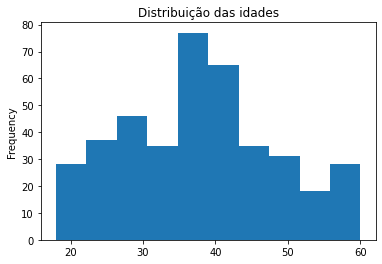

In [120]:
df['Age'].plot(kind='hist',title='Distribuição das idades')

Adulto maduro    34.50
Jovem idoso      27.25
Adulto           25.00
Idoso            13.25
Name: Faixa etaria, dtype: float64

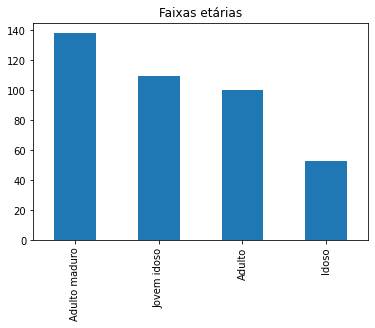

In [177]:
df['Faixa etaria'].value_counts().plot(kind='bar',title='Faixas etárias')
df['Faixa etaria'].value_counts()*100/len(df['Faixa etaria'])

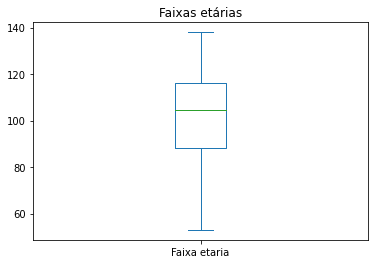

In [176]:
df['Faixa etaria'].value_counts().plot(kind='box',title='Faixas etárias')

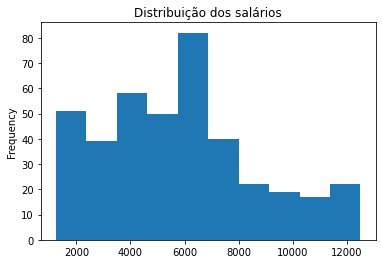

In [128]:
df['Month_Salary'].plot(kind='hist', title='Distribuição dos salários')

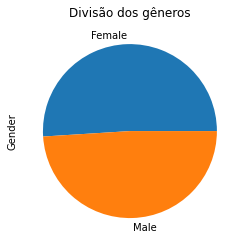

In [129]:
df['Gender'].value_counts().plot(kind='pie', title = 'Divisão dos gêneros')

Não    64.25
Sim    35.75
Name: Comprou, dtype: float64

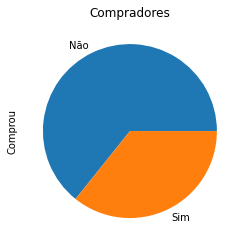

In [149]:
df['Comprou'].value_counts().plot(kind='pie', title='Compradores')
df['Comprou'].value_counts()*100/len(df['Comprou'])

B    73.75
A    17.75
C     7.50
E     1.00
Name: Classes, dtype: float64

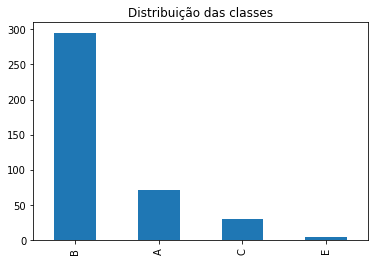

In [151]:
df['Classes'].value_counts().plot(kind='bar', title='Distribuição das classes')
df['Classes'].value_counts()*100/len(df['Classes'])

## Avaliação dos não compradores

B    85.992218
C     8.171206
A     4.280156
E     1.556420
Name: Classes, dtype: float64

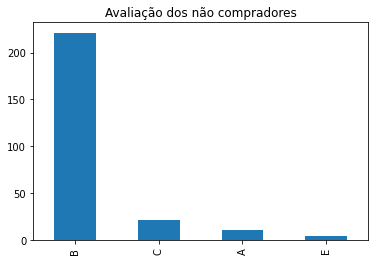

In [171]:
df[df['Comprou'] == 'Não']['Classes'].value_counts().plot(kind='bar', title='Avaliação dos não compradores')
df[df['Comprou'] == 'Não']['Classes'].value_counts()*100/len(df[df['Comprou'] == 'Não'])

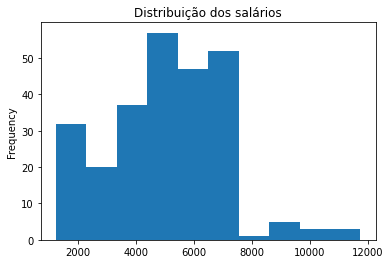

In [172]:
df[df['Comprou'] == 'Não']['Month_Salary'].plot(kind='hist', title='Distribuição dos salários')

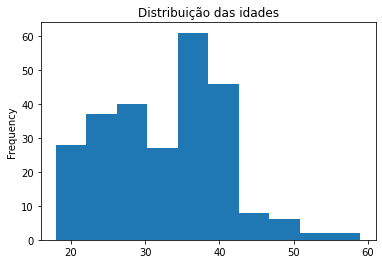

In [174]:
df[df['Comprou'] == 'Não']['Age'].plot(kind='hist', title='Distribuição das idades')

Adulto maduro    41.245136
Adulto           37.354086
Jovem idoso      19.455253
Idoso             1.945525
Name: Faixa etaria, dtype: float64

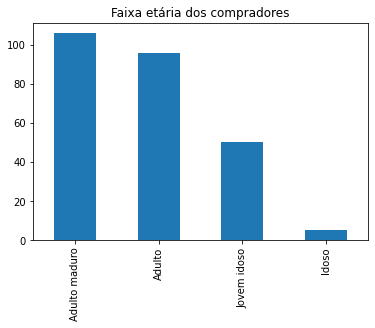

In [175]:
df[df['Comprou'] == 'Não']['Faixa etaria'].value_counts().plot(kind='bar',title='Faixa etária dos compradores')
df[df['Comprou'] == 'Não']['Faixa etaria'].value_counts()*100/len(df[df['Comprou'] == 'Não'])

## Avaliação dos compradores

B    51.748252
A    41.958042
C     6.293706
Name: Classes, dtype: float64

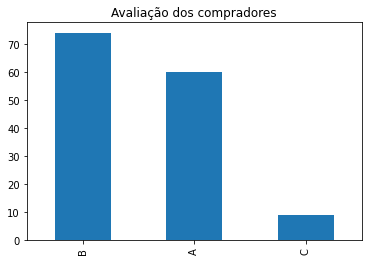

In [167]:
df[df['Comprou'] == 'Sim']['Classes'].value_counts().plot(kind='bar', title='Avaliação dos compradores')
df[df['Comprou'] == 'Sim']['Classes'].value_counts()*100/len(df[df['Comprou'] == 'Sim'])

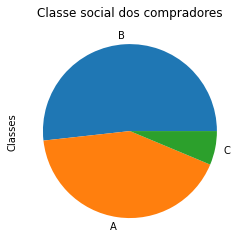

In [154]:
df[df['Comprou'] == 'Sim']['Classes'].value_counts().plot(kind='pie', title='Classe social dos compradores')

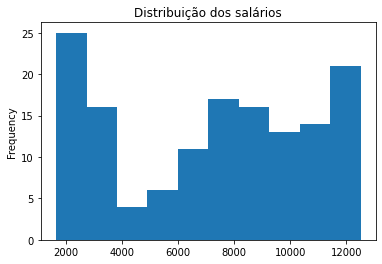

In [158]:
df[df['Comprou'] == 'Sim']['Month_Salary'].plot(kind='hist', title='Distribuição dos salários')

Jovem idoso      41.258741
Idoso            33.566434
Adulto maduro    22.377622
Adulto            2.797203
Name: Faixa etaria, dtype: float64

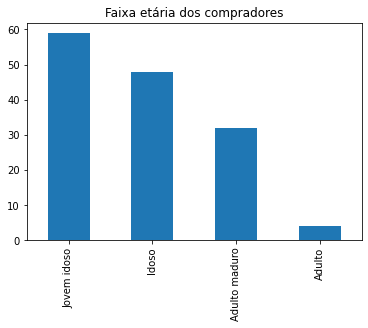

In [168]:
df[df['Comprou'] == 'Sim']['Faixa etaria'].value_counts().plot(kind='bar',title='Faixa etária dos compradores')
df[df['Comprou'] == 'Sim']['Faixa etaria'].value_counts()*100/len(df[df['Comprou'] == 'Sim'])

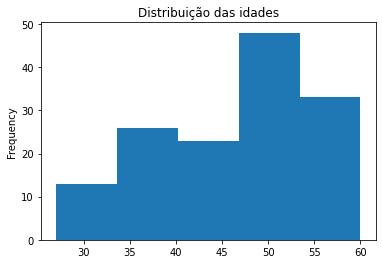

In [165]:
df[df['Comprou'] == 'Sim']['Age'].plot(kind='hist', title='Distribuição das idades', bins=5)

In [161]:
df[df['Comprou'] == 'Sim']['Age'].describe()

count    143.000000
mean      46.391608
std        8.612172
min       27.000000
25%       39.500000
50%       47.000000
75%       53.000000
max       60.000000
Name: Age, dtype: float64

Conclusão

A campanha foi exibida para

##Perfil do cliente:
A campanha foi exibida para pessoas com idades entre 18 e 60 anos, sendo 86% Adulto, Adultos maduros e Jovens idosos com renda de 'US 1250,00' a 'US 12000,00', sendo 90% das classes A e B. As compras foram realizados por pessoas com idades entre 30 e 60 anos, com maior frequencia de pessoas a cima dos 40 anos (97%). Pertencentes as classes A, B e C sendo as duas primeiras responsáveis por 93% das compras.